In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [4]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

<Axes: xlabel='number'>

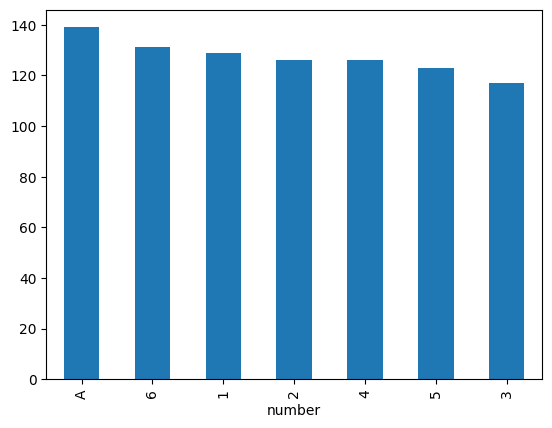

In [6]:
df['number'].value_counts().plot.bar()

In [7]:
#  Extract numerical part

df['number_numerical'] = pd.to_numeric(df['number'],errors='coerce',downcast='integer')


In [8]:
# Extract categorical part

df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)


In [9]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [10]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part
df['cabin_cat'] = df['Cabin'].str[0] # captures the first letter


df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_33446/2857960340.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['cabin_num'] = df['Cabin'].str.extract('(\d+)') # captures numerical part


,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<Axes: xlabel='cabin_cat'>

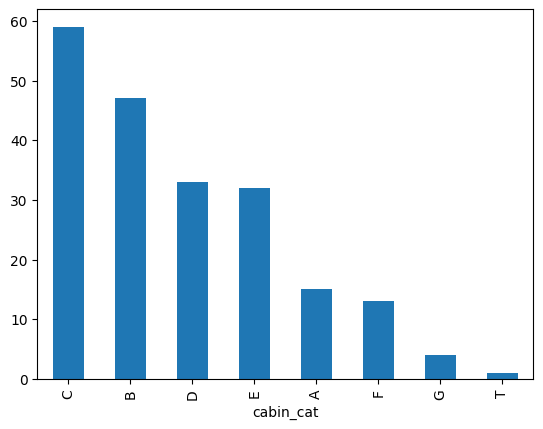

In [14]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [15]:
# Extract the last bit of ticket number

df['Ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['Ticket_num'] = pd.to_numeric(df['Ticket_num'],
                                 errors='coerce',
                                 downcast='integer')

# Extract the first part of ticket as category

df['Ticket_cat'] =df['Ticket'].apply(lambda s:s.split()[0])
df['Ticket_cat'] =np.where(df['Ticket_cat'].str.isdigit(),
                           np.nan,df['Ticket_cat'])





In [16]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,Ticket_num,Ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
